# Modelación espacio-temporal de la Caldera de Acoculco
# Módulo con las funciones utilizadas.
## José Eduardo Lara Rodríguez.
## Geofísica Matemática Computacional
## Fecha 22 de octubre 2021

Arithmetic (1, 2) : 1.5
Harmonic (1,2) : 1.3333333333333333 

Press enter
Gamma:[0.01625838 0.17802939 0.12235845 0.28878574 0.72970827 0.96461654
 0.99838654]
Gamma (Arithmetic):[0.09714388423262349, 0.15019391985266872, 0.2055720952898259, 0.5092470047089677, 0.8471624013278936, 0.9815015358246]
Gamma (Harmonic):[0.029795688053884963, 0.14503516567329697, 0.17188799463012838, 0.41380576007967346, 0.8308780693448845, 0.9812110592398834] 

Press enter
PRUEBA FUNCIÓN calcDth(Dth_data, z, N)  


Datos del problema 
   depth1  depth2     k     cp     rho
0       0      50  1.84  840.0  2120.0
1      50     250  1.41  840.0  2340.0
2     250     400  1.36  840.0  2300.0
3     400     600  1.44  840.0  2300.0
4     600     800  1.46  840.0  2290.0
5     800    1000  1.68  840.0  2700.0
6    1000    1500  1.84  890.0  2700.0
7    1500    1900  1.66  890.0  2360.0
8    1900    4000  2.10  950.0  2760.0

 Dth : 
0    1.033243e-06
1    7.173382e-07
2    7.039337e-07
3    7.453416e-07
4    7.589

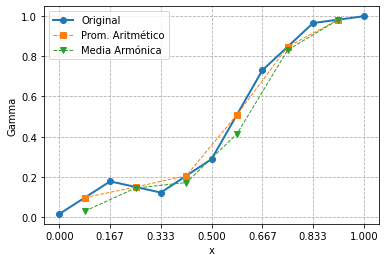

Press enter
None:
[[-0.35605878  0.17802939  0.          0.          0.        ]
 [ 0.17802939 -0.2447169   0.12235845  0.          0.        ]
 [ 0.          0.12235845 -0.57757149  0.28878574  0.        ]
 [ 0.          0.          0.28878574 -1.45941653  0.72970827]
 [ 0.          0.          0.          0.96461654 -1.92923307]]
Arithmetic:
[[-0.2473378   0.15019392  0.          0.          0.        ]
 [ 0.15019392 -0.35576602  0.2055721   0.          0.        ]
 [ 0.          0.2055721  -0.7148191   0.509247    0.        ]
 [ 0.          0.          0.509247   -1.35640941  0.8471624 ]
 [ 0.          0.          0.          0.8471624  -1.82866394]]
Harmonic:
[[-0.17483085  0.14503517  0.          0.          0.        ]
 [ 0.14503517 -0.31692316  0.17188799  0.          0.        ]
 [ 0.          0.17188799 -0.58569375  0.41380576  0.        ]
 [ 0.          0.          0.41380576 -1.24468383  0.83087807]
 [ 0.          0.          0.          0.83087807 -1.81208913]]
NS Arithmeti

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate


def arithmeticMean(a, b):
    """
    Calcula la media aritmética entre a y b.
    
    Parameters
    ----------
    a, b: int
    Valores a interpolar.
    
    Returns
    -------
    La media aritmética.
    """
    return 0.5 * (a + b)

def harmonicMean(a, b):
    """
    Calcula la media harmónica entre a y b.
    
    Parameters
    ----------
    a, b: int
    Valores a interpolar.
    
    Returns
    -------
    La media harmónica.
    """    
    return 2 * a * b / (a + b)
    
def Laplaciano1D(N, d, f=None):
    """
    Calcula la matriz del Laplaciano usando diferencias finitas en 1D.
    
    Parameters
    ----------
    N: int
    Tamaño de la matriz
    
    d: float
    Valores del coeficiente Gamma de la ecuación.
    
    f: function
    Función para calcular el promedio entre dos valores.
    
    Returns
    -------
    A: ndarray
    La matriz del sistema.
    """
    if f == None:
        A = np.zeros((N,N))
        A[0, 0] = -2 * d[1]
        A[0, 1] = d[1]
        
        for i in range(1,N-1):
            A[i,i] = -2 * d[i+1]
            A[i,i+1] = d[i+1] #harmonicMean(d[i], d[i+1])
            A[i,i-1] = d[i] #harmonicMean(d[i], d[i+1])
            
        A[N-1,N-2] = d[N]
        A[N-1,N-1] = -2 * d[N]

    else:        
        A = np.zeros((N,N))
        A[0, 0] -= ( f(d[0], d[1]) + f(d[1], d[2]) )
        A[0, 1] = f(d[1], d[2])
        
        for i in range(1,N-1):
            A[i,i] -= ( f(d[i], d[i+1]) + f(d[i+1], d[i+2]) )
            A[i,i+1] = f(d[i+1], d[i+2])
            A[i,i-1] = f(d[i+1], d[i])

        A[N-1,N-2] = f(d[N-1], d[N])
        A[N-1,N-1] -= ( f(d[N-1], d[N]) + f(d[N], d[N+1]) )

    return A


def Laplaciano1D_NS(N, d, f=None):
    """
    Calcula la matriz del Laplaciano usando diferencias finitas en 1D.
    
    Parameters
    ----------
    N: int
    Tamaño de la matriz
    
    d: float
    Valores del coeficiente Gamma de la ecuación.
    
    f: function
    Función para calcular el promedio entre dos valores.
    
    Returns
    -------
    A: ndarray
    La matriz del sistema.
    """
    if f == None:
        A = np.zeros((N,N))
        A[0, 0] = ( 2 * d[1] + 1 )
        A[0, 1] = -d[1]

        for i in range(1,N-1):
            A[i,i] = ( 2 * d[i+1] + 1 )
            A[i,i+1] = -harmonicMean(d[i], d[i+1])
            A[i,i-1] = -harmonicMean(d[i], d[i+1])

        A[N-1,N-2] = -d[N]
        A[N-1,N-1] = ( 2 * d[N] + 1)

    else:     
        A = np.zeros((N,N))
        A[0, 0] = ( f(d[0], d[1]) + f(d[1], d[2]) + 1 )
        A[0, 1] = -f(d[1], d[2])    
        for i in range(1,N-1):
            A[i,i] = ( f(d[i], d[i+1]) + f(d[i+1], d[i+2]) + 1 )
            A[i,i+1] = -f(d[i+1], d[i+2])
            A[i,i-1] = -f(d[i+1], d[i])

        A[N-1,N-2] = -f(d[N-1], d[N])
        A[N-1,N-1] = ( f(d[N-1], d[N]) + f(d[N], d[N+1]) + 1)


    
    return A


def calcDth(Dth_data, z, N):
  """
    Calcula los valores de Dth paara cada intervalo de profundidad donde los 
    parámetros físicos varían.
    
    Parameters
    ----------
    N: int
    Tamaño de la matriz, numero de nodos.
    
    z: array
    Nos indica la coordenada z de la profundidad.
    
    Dth_data: array
    Arreglo donde están almacenados los valores de Dth calculados.
    
    Returns
    -------
    Dth: array
    Arreglo donde se almacena los valores calculados Dth dependiendo de la profundidad a la que nos encontremos.
    """
  
  Dth = np.zeros((N+2))
  for k in range(0, N+2):
    if (z[k] <= 50.0):
        Dth[k] = Dth_data[0]
    elif ((z[k] > 50.0) and (z[k] <= 250.0)):
        Dth[k] = Dth_data[1]
    elif ((z[k] > 250.0) and (z[k] <= 400.0)):
        Dth[k] = Dth_data[2]
    elif ((z[k] > 400.0) and (z[k] <= 600.0)):
        Dth[k] = Dth_data[3]
    elif ((z[k] > 600.0) and (z[k] <= 800.0)):
        Dth[k] = Dth_data[4]
    elif ((z[k] > 800.0) and (z[k] <= 1000.0)):
        Dth[k] = Dth_data[5]
    elif ((z[k] > 1000.0) and (z[k] <= 1500.0)):
        Dth[k] = Dth_data[6]
    elif ((z[k] > 1500.0) and (z[k] <= 1900.0)):
        Dth[k] = Dth_data[7]
    else:
        Dth[k] = Dth_data[8]


        
#print('\nCoeficiente en los puntos de la simulación: \n D_th shape = {} \n{}'.format(Dth.shape, Dth))

  return Dth


def interpTemp(z, z_dat, T_dat):


  tck = interpolate.splrep(z_dat, T_dat, s = 0)
  T = interpolate.splev(z, tck, der = 0)

  return T
"""
    Interpola a los lugares de la simulación a partir de valores de profundidad z y valores de temperatura T.
    Interpola valores de la condición inicial y el perfil final (actual).
    
    Parameters
    ----------
    z: array
    Nos indica la coordenada z de la profundidad.
    
    z_dat: array 
    Arreglo con valores específicos de profundidad z.
    
    T_dat: array
    Arreglo con los valores de tempperatura para cada valor de profundidad.
    
    Returns
    -------
    T: array
    Arreglo donde se almacena los valores interpolados de las temperaturas.
    """




#----------------------- TEST OF THE MODULE ----------------------------------   
if __name__ == '__main__':
    
    print('Arithmetic (1, 2) : {}'.format(arithmeticMean(1,2)))
    print('Harmonic (1,2) : {} \n'.format(harmonicMean(1,2)))
    input('Press enter')

    N = 5
    gamma = np.random.rand(N+2)
    print('Gamma:{}'.format(gamma))

    # Interpolación de la Gamma en los puntos medios
    gammaAM = [arithmeticMean(gamma[i], gamma[i+1]) for i in range(0, len(gamma)-1)]
    gammaHM = [harmonicMean(gamma[i], gamma[i+1]) for i in range(0, len(gamma)-1)]

    print('Gamma (Arithmetic):{}'.format(gammaAM))
    print('Gamma (Harmonic):{} \n'.format(gammaHM))

    input('Press enter')

    #Para probar la función calcDth(Dth_data, z, N) se usan los siguientes datos
    L = 4000.0
    z = np.linspace(0, L, N+2)
    data = pd.read_csv('phys_dat.csv')  #Lectura de datos: k, cp, rho
    Dth_data = data['k'] / (data['rho']*data['cp'])  #Cálculo de los coeficientes Dth
    print('PRUEBA FUNCIÓN calcDth(Dth_data, z, N)  \n')
    print('\nDatos del problema \n{}'.format(data))
    print('\n Dth : \n{}'.format(Dth_data))
    Dth = calcDth(Dth_data, z, N)
    print('\nCoeficiente en los puntos de la simulación: \n D_th shape = {} \n{}'.format(Dth.shape, Dth))

    #Para probar la función interpTemp(z_dat, T_dat) se usan los sig datos
    L = 4000.0
    z = np.linspace(0, L, N+2)
    z_dat = [0, 100, 200, 400, 710, 803, 1100, 1200, 1400, 1500, 1600, 1700, 1800, 2000, 2500, 3000, 3500, 4000]
    # Condición inicial: Temperaturas
    T_dat = [15, 113, 145, 178, 155, 201, 215, 282, 223, 226, 252, 284, 310, 350, 450, 550, 650, 750]
    T_ini = interpTemp(z, z_dat, T_dat)
    print('\n\nPRUEBA FUNCIÓN interpTemp(z_dat, T_dat)   \n')
    print('Temperatura inicial \n')
    print(T_ini)

    
    
    # Graficación de las Gammas
    import matplotlib.pyplot as plt
    h = 1.0 / (N+1)
    x = np.linspace(0,1,N+2)
    xm = x[:-1] + h * 0.5
    plt.plot(x, gamma, 'o-', label='Original', lw=2)
    plt.plot(xm, gammaAM, 's--', label='Prom. Aritmético', lw=1.0)
    plt.plot(xm, gammaHM, 'v--', label='Media Armónica', lw=1.0)
    plt.xlabel('x')
    plt.ylabel('Gamma')
    plt.xticks(x)
    plt.grid(ls='--')
    plt.legend()
    plt.show()
    
    input('Press enter')
    
    # Creación de las matrices
    print('None:\n{}'.format(Laplaciano1D(N, gamma)))
    print('Arithmetic:\n{}'.format(Laplaciano1D(N, gamma, arithmeticMean)))
    print('Harmonic:\n{}'.format(Laplaciano1D(N, gamma, harmonicMean)))
    print('NS Arithmetic:\n{}'.format(Laplaciano1D_NS(N, gamma, arithmeticMean)))
    print('NS Harmonic:\n{}'.format(Laplaciano1D_NS(N, gamma, harmonicMean)))